In [45]:
import sys
sys.path.append(r'D:\v1ktop\Drive-INAOE\Code\data_aumentation_for_author_profiling')

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
from word_level_da.preprocessing.load_data import Dataset

In [49]:
from word_level_da.classifier.feature_extraction import FeatureExtraction

In [50]:
data=Dataset(key="depresion19_local", encode=True, remove_end=True)

In [51]:
original_training=data.get_dataset(folder_name="prep_chunks_filtered_neg_only", truth_name="golden_truth_filtered.txt",
                partition="training")

In [52]:
docs_positive_class=[]

In [53]:
for i in range(len(original_training[0])):
    if(original_training[1][i]==1):
        docs_positive_class.append(original_training[0][i])
        

In [54]:
cv = CountVectorizer(binary=True )

In [55]:
def get_docs_difference(augmentation_method="Xi", augmentation_test="", n_docs=[1], original_vocab=None, original_data=None, both=False):
    differences=[]
    for n in n_docs:
        diff=[]
        diff.append(n)
        prefix=augmentation_method+str(n)
        folder=augmentation_method+augmentation_test+"/"+prefix
        truth_file=augmentation_method+augmentation_test+"/"+prefix+".txt"
        training_a= data.get_dataset(folder_name=folder, truth_name=truth_file,
                                     partition="augmented")
        if both:
            cv.fit_transform(np.append(training_a[0], original_data))
            #print(len(cv.stop_words_))
        else:
            cv.fit_transform(training_a[0])
            #print(len(cv.stop_words_))

        voc_aug=set(cv.vocabulary_.keys())
        voc_diff=voc_aug-original_vocab
        diff.append(len(original_vocab))
        diff.append(len(voc_aug))
        diff.append(len(voc_diff))
        differences.append(diff)
    return differences 

In [56]:
cv.fit_transform(docs_positive_class)

<16x16620 sparse matrix of type '<class 'numpy.int64'>'
	with 40500 stored elements in Compressed Sparse Row format>

In [57]:
original_voc=set(cv.vocabulary_.keys())

## Tamaño de los vocabularios segun el numero de nuevos documentos y el porcentaje modificado- Clase positiva 

### Xi

In [58]:

n_docs=[i for i in range(1,11)]

In [59]:
xi_diff=get_docs_difference(augmentation_method="Xi", n_docs=n_docs, 
                            original_vocab=original_voc, both=False)

KeyboardInterrupt: 

In [ ]:
xi_diff[1]

In [ ]:
df1 = pd.DataFrame(xi_diff)
df1.columns = ["n", "original", "augmento", "dif"]

In [ ]:
xi_by_n=df1.groupby("n").mean()

In [ ]:
plt.plot(xi_by_n["dif"])

### Thesauro

In [ ]:
rand_diff=get_docs_difference(augmentation_method="Thesaurus", n_docs=n_docs,
                    original_vocab=original_voc)

In [ ]:
rand_df = pd.DataFrame(rand_diff)
rand_df.columns = ["n", "original", "augmentado", "dif"]


In [ ]:
rand_df_n=rand_df.groupby("n").mean()

In [ ]:
plt.plot(rand_df_n["dif"])

## $Rel_1$

In [ ]:
l1_diff=get_docs_difference(augmentation_method="Rel_1", n_docs=n_docs,
                    original_vocab=original_voc, both=False)

In [ ]:
l1_diff[1]

In [ ]:
dfl1 = pd.DataFrame(l1_diff)
dfl1.columns = ["n", "original", "augmento", "dif"]

In [ ]:
l1_by_n=dfl1.groupby("n").mean()

In [ ]:
plt.plot(l1_by_n["dif"])

## Context_1

In [ ]:
cos_diff=get_docs_difference(augmentation_method="Context_1", n_docs=n_docs,
                    original_vocab=original_voc, both=False)

In [ ]:
cos_diff[1]

In [ ]:
dfcos = pd.DataFrame(cos_diff)
dfcos.columns = ["n", "original", "augmento", "dif"]

In [ ]:
cos_by_n=dfcos.groupby("n").mean()

In [ ]:
plt.plot(cos_by_n["dif"])

## $Context_0$

In [ ]:
negative_class=[]
for i in range(len(original_training[0])):
    if(original_training[1][i]==0):
        negative_class.append(original_training[0][i])

In [ ]:
cv.fit_transform(negative_class)

In [ ]:
len(cv.vocabulary_.keys())

In [ ]:
analogy_diff=get_docs_difference(augmentation_method="Rel_0", n_docs=n_docs,
                    original_vocab=original_voc, both=False)

In [ ]:
df_analogy = pd.DataFrame(analogy_diff)
df_analogy.columns = ["n", "original", "augmentado", "dif"]

In [ ]:
l0_by_n=df_analogy.groupby('n').mean()

In [ ]:
l0_by_n

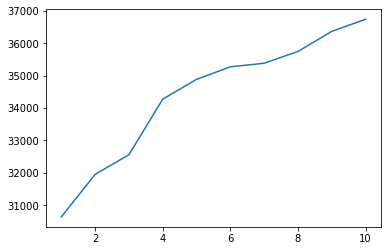

In [37]:
plt.plot(l0_by_n["dif"])

## Metodos y aumentos

In [38]:
x1=xi_by_n["dif"].to_numpy()

In [39]:
x2=rand_df_n["dif"].to_numpy()

In [40]:
x3=l0_by_n["dif"].to_numpy()

In [41]:
x4=l1_by_n["dif"].to_numpy()

In [42]:
x_eje=n_docs

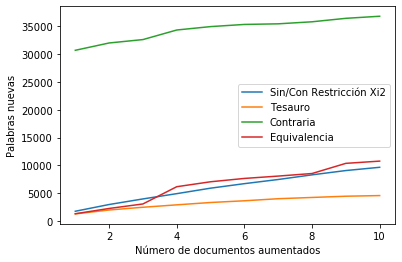

In [60]:
beingsaved = plt.figure()
plt.plot(x_eje, x1)
plt.plot(x_eje,x2)
plt.plot(x_eje,x3)
plt.plot(x_eje,x4)
plt.legend(["Sin/Con Restricción Xi2", "Tesauro", "Contraria", "Equivalencia",])
plt.xlabel('Número de documentos aumentados')
plt.ylabel('Palabras nuevas')
plt.show()
beingsaved.savefig("pos_plot.png", format="png")

## Tamaño de los vocabularios segun el numero de nuevos documentos y el porcentaje modificado. Ambas clases

In [61]:
cv.fit_transform(original_training[0])
original_voc_both=set(cv.vocabulary_.keys())

### Xi

In [62]:
xi_diff=get_docs_difference(augmentation_method="Xi", n_docs=n_docs,
                    original_vocab=original_voc_both, both=True,
                            original_data=original_training[0])

In [63]:
df = pd.DataFrame(xi_diff)
df.columns = ["n", "original", "augmentado", "dif"]

In [64]:
by_n_xi_diff=df.groupby("n").mean()

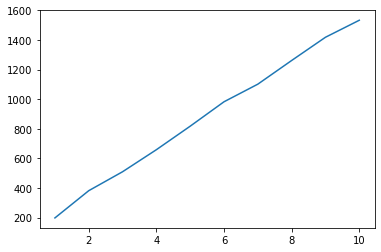

In [65]:
plt.plot(by_n_xi_diff["dif"])

### Thesaurus

In [66]:
rand_diff=get_docs_difference(augmentation_method="Thesaurus", n_docs=n_docs,
                    original_vocab=original_voc_both, both=True, original_data=original_training[0])

In [67]:
df_rand_diff = pd.DataFrame(rand_diff)
df_rand_diff.columns = ["n", "original", "augmented", "dif"]


In [68]:
df_rand_diff_by_n=df_rand_diff.groupby("n").mean()

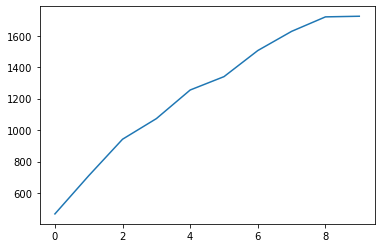

In [69]:
plt.plot(df_rand_diff["dif"])

## $Rel_1$

In [70]:
l1_diff_both=get_docs_difference(augmentation_method="Rel_1", n_docs=n_docs,
                    original_vocab=original_voc_both, both=True,
                            original_data=original_training[0])

In [71]:
df_l1_both = pd.DataFrame(l1_diff_both)
df_l1_both.columns = ["n", "original", "augmentado", "dif"]

In [72]:
by_n_l1_diff=df_l1_both.groupby("n").mean()

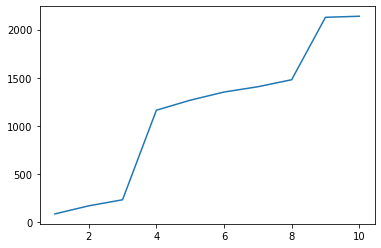

In [73]:
plt.plot(by_n_l1_diff["dif"])

## $Context_0$

In [74]:
analogy_diff2=get_docs_difference(augmentation_method="Rel_0", n_docs=n_docs,
                    original_vocab=original_voc_both, both=True,
                                  original_data=original_training[0])

In [75]:
df_an_diff = pd.DataFrame(analogy_diff2)
df_an_diff.columns = ["n","original", "augmented", "dif"]

In [76]:
df_an_diff_by_n=df_an_diff.groupby("n").mean()

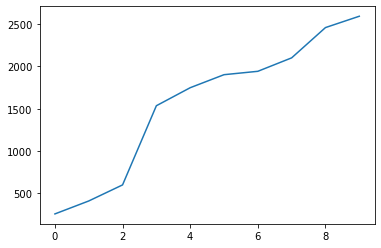

In [77]:
plt.plot(df_an_diff["dif"])

## Resumen

In [78]:
x1=by_n_xi_diff["dif"].to_numpy()

In [79]:
x2=df_rand_diff_by_n["dif"].to_numpy()

In [80]:
x3=df_an_diff_by_n["dif"].to_numpy()

In [81]:
x4=by_n_l1_diff["dif"].to_numpy()

In [82]:
x_eje=n_docs

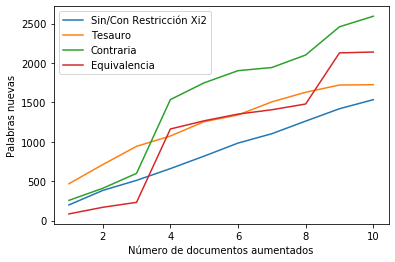

In [84]:
begin_save2=plt.figure()
plt.plot(x_eje, x1)
plt.plot(x_eje,x2)
plt.plot(x_eje,x3)
plt.plot(x_eje,x4)
plt.legend(["Sin/Con Restricción Xi2", "Tesauro", "Contraria", "Equivalencia",])
plt.xlabel('Número de documentos aumentados')
plt.ylabel('Palabras nuevas')
plt.show()
begin_save2.savefig("both_plot_1.png")